<a href="https://colab.research.google.com/github/barbosa-loha/Estatistica/blob/main/Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pacotes utilizados:

In [ ]:
install.packages("mlbench")

In [ ]:
install.packages("tibble")

In [ ]:
install.packages("vctrs")

In [ ]:
install.packages("lattice")

In [ ]:
install.packages("ggplot2")

In [ ]:
install.packages("rlang")

In [ ]:
install.packages("caret")

In [ ]:
install.packages("mice")

In [ ]:
install.packages("rattle")

In [ ]:
library(mlbench)
library(tibble)
library(vctrs)
library(lattice)
library(ggplot2)
library(rlang)
library(caret)
library(mice)
library(rattle)
library(class)

Carregando o banco de dados:

In [24]:
data(BreastCancer)

Removendo valores NA

In [25]:
dataset_impute <- mice(BreastCancer[,2:10],  print = FALSE)

In [38]:
summary(BreastCancer)

       Class      Cl.thickness   Cell.size     Cell.shape  Marg.adhesion
 benign   :458   1      :145   1      :384   1      :353   1      :407  
 malignant:241   5      :130   10     : 67   2      : 59   2      : 58  
                 3      :108   3      : 52   10     : 58   3      : 58  
                 4      : 80   2      : 45   3      : 56   10     : 55  
                 10     : 69   4      : 40   4      : 44   4      : 33  
                 2      : 50   5      : 30   5      : 34   8      : 25  
                 (Other):117   (Other): 81   (Other): 95   (Other): 63  
  Epith.c.size  Bare.nuclei   Bl.cromatin  Normal.nucleoli    Mitoses   
 2      :386   1      :411   2      :166   1      :443     1      :579  
 3      : 72   10     :133   3      :165   10     : 61     2      : 35  
 4      : 48   2      : 31   1      :152   3      : 44     3      : 33  
 1      : 47   5      : 30   7      : 73   2      : 36     10     : 14  
 6      : 41   3      : 29   4      : 40   8      :

Descritiva:

In [39]:
table(BreastCancer$Class)


   benign malignant 
      458       241 


   benign malignant 
0.6552217 0.3447783 

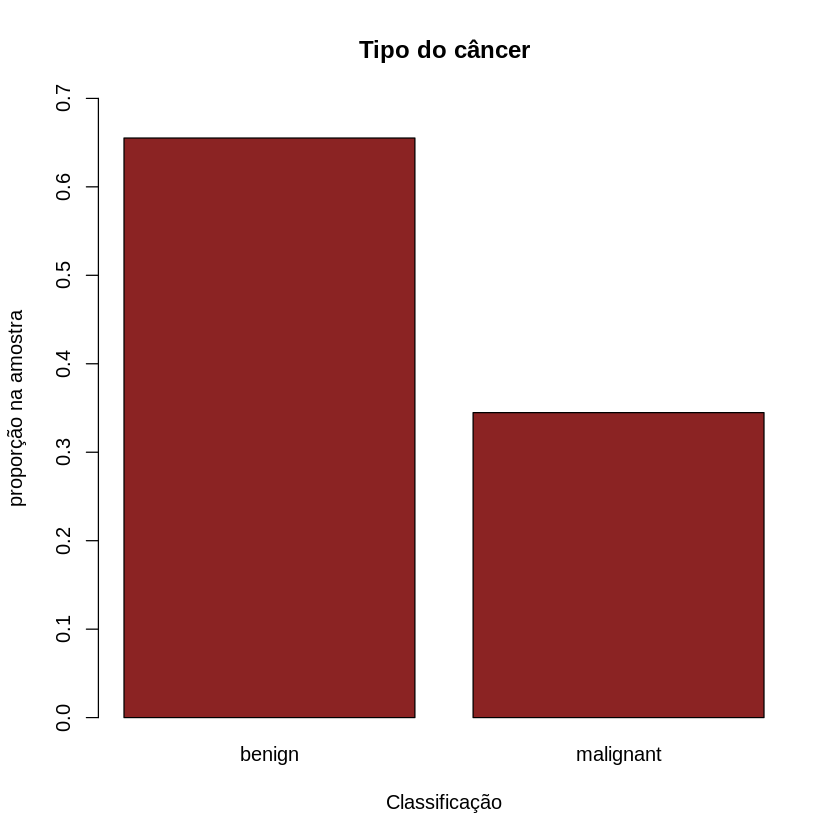

In [17]:
table1<-table(BreastCancer$Class)
prop.table(table1)
barplot(prop.table(table1),
        main = "Tipo do câncer",
        xlab = "Classificação",
        ylab = "proporção na amostra",
        col = "brown4",
        ylim = c( 0 , 0.7))

Cerca de 65% dos câncer são benignos e 34% são malignos.

para entender a relação entre o tipo de câncer a algumas variáveis pode obervar os gráficos bivariados a seguir.

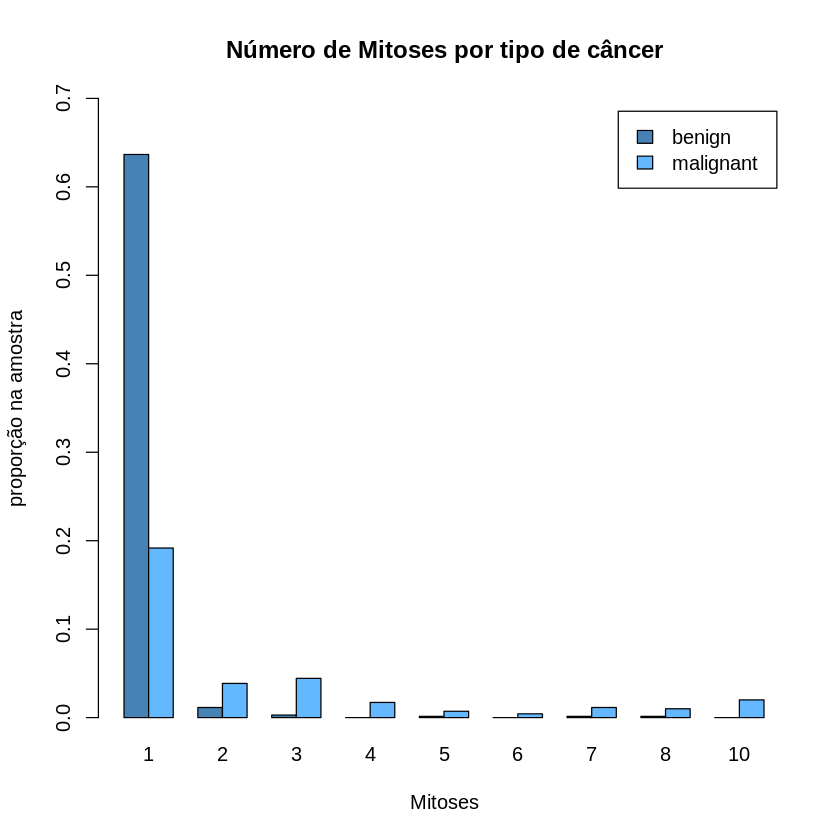

In [18]:
table2<-table(BreastCancer$Class, BreastCancer$Mitoses)

barplot(prop.table(table2),
        main = "Número de Mitoses por tipo de câncer",
        xlab = "Mitoses",
        ylab = "proporção na amostra",
        col = c('steelblue','steelblue1'),
        ylim = c( 0 , 0.7),
        beside = T,
        legend.text = TRUE)

In [19]:
prop.table(table2)

           
                      1           2           3           4           5
  benign    0.636623748 0.011444921 0.002861230 0.000000000 0.001430615
  malignant 0.191702432 0.038626609 0.044349070 0.017167382 0.007153076
           
                      6           7           8          10
  benign    0.000000000 0.001430615 0.001430615 0.000000000
  malignant 0.004291845 0.011444921 0.010014306 0.020028612

Pode-se perceber que quanto mais próximo de Mitoses = 1 há mais câncer detectado como benigno do que maligno. quando Mitoses > 1, há o dobro ou mais câncer maligno do que benigno.

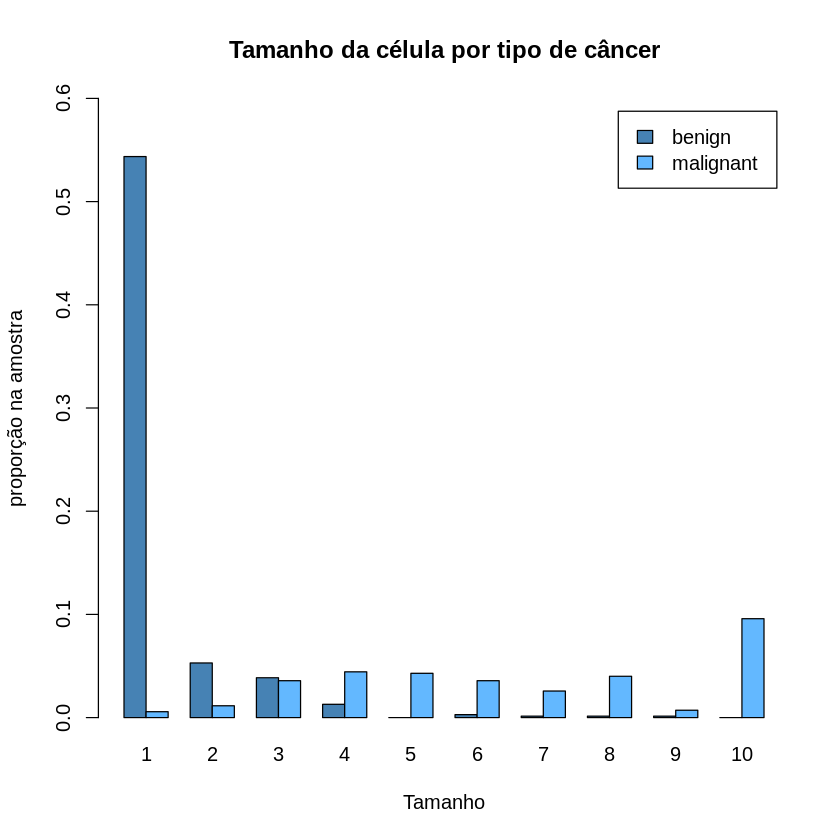

In [20]:
table3<-table(BreastCancer$Class, BreastCancer$Cell.size)

barplot(prop.table(table3),
        main = "Tamanho da célula por tipo de câncer",
        xlab = "Tamanho",
        ylab = "proporção na amostra",
        col = c('steelblue','steelblue1'),
        ylim = c( 0 , 0.6),
        beside = T,
        legend.text = TRUE)

In [21]:
prop.table(table3)

           
                      1           2           3           4           5
  benign    0.543633763 0.052932761 0.038626609 0.012875536 0.000000000
  malignant 0.005722461 0.011444921 0.035765379 0.044349070 0.042918455
           
                      6           7           8           9          10
  benign    0.002861230 0.001430615 0.001430615 0.001430615 0.000000000
  malignant 0.035765379 0.025751073 0.040057225 0.007153076 0.095851216

Semelhante a interpretação acima, há mais câncer do tipo maligno a medida que o tamanho celular aumenta.

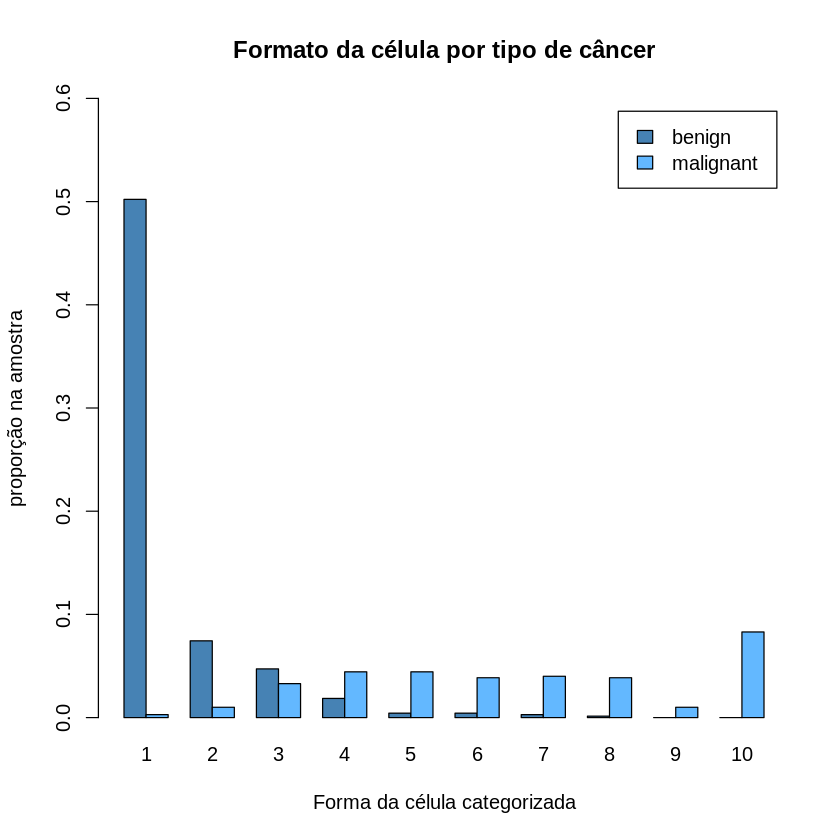

In [22]:
table4<-table(BreastCancer$Class, BreastCancer$Cell.shape)

barplot(prop.table(table4),
        main = "Formato da célula por tipo de câncer",
        xlab = "Forma da célula categorizada",
        ylab = "proporção na amostra",
        col = c('steelblue','steelblue1'),
        ylim = c( 0 , 0.6),
        beside = T,
        legend.text = TRUE)

In [23]:
prop.table(table4)

           
                      1           2           3           4           5
  benign    0.502145923 0.074391989 0.047210300 0.018597997 0.004291845
  malignant 0.002861230 0.010014306 0.032904149 0.044349070 0.044349070
           
                      6           7           8           9          10
  benign    0.004291845 0.002861230 0.001430615 0.000000000 0.000000000
  malignant 0.038626609 0.040057225 0.038626609 0.010014306 0.082975680

Quando o formato da célula é do tipo 1, 50% do câncer é detectado como benigno e menos de 1% é detectado como maligno. Quando o formato da célula é 4, 4% do tipo de câncer é maligno e menos de 1% é detectado como benigno. O número de câncer maligno auemtna a medida que o número categorizado da célula aumenta.

Definindo treino, teste e validação:

# Modelo arvore de decisão

In [26]:
dados <- na.omit(BreastCancer)

In [27]:
set.seed(1234)
data_index <- createDataPartition(dados$Class, p=0.7, list = FALSE)
train_data <- dados[data_index, -1]
test_data <- dados[-data_index, -1]

## Applying learning models
fitControl <- trainControl(method="cv",
                           number = 5,
                           preProcOptions = list(thresh = 0.99), # threshold for pca preprocess
                           classProbs = TRUE,
                           summaryFunction = twoClassSummary)

In [28]:
## arvore de decison
library("rpart")
library("rattle")


In [29]:
set.seed(1)
cart_model <- train(Class ~ ., train_data, method="rpart")
cart_model

CART 

479 samples
  9 predictor
  2 classes: 'benign', 'malignant' 

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 479, 479, 479, 479, 479, 479, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.01785714  0.9441651  0.8758740
  0.04761905  0.9388522  0.8652512
  0.81547619  0.8106825  0.5009798

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was cp = 0.01785714.

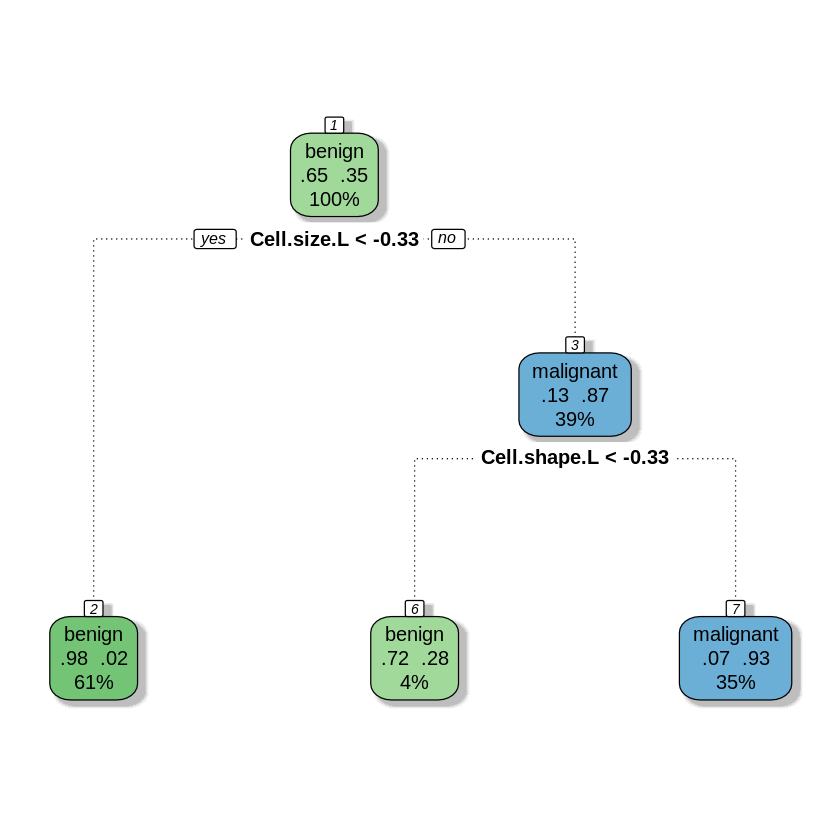

In [30]:
fancyRpartPlot(cart_model$finalModel, sub="")

# KNN

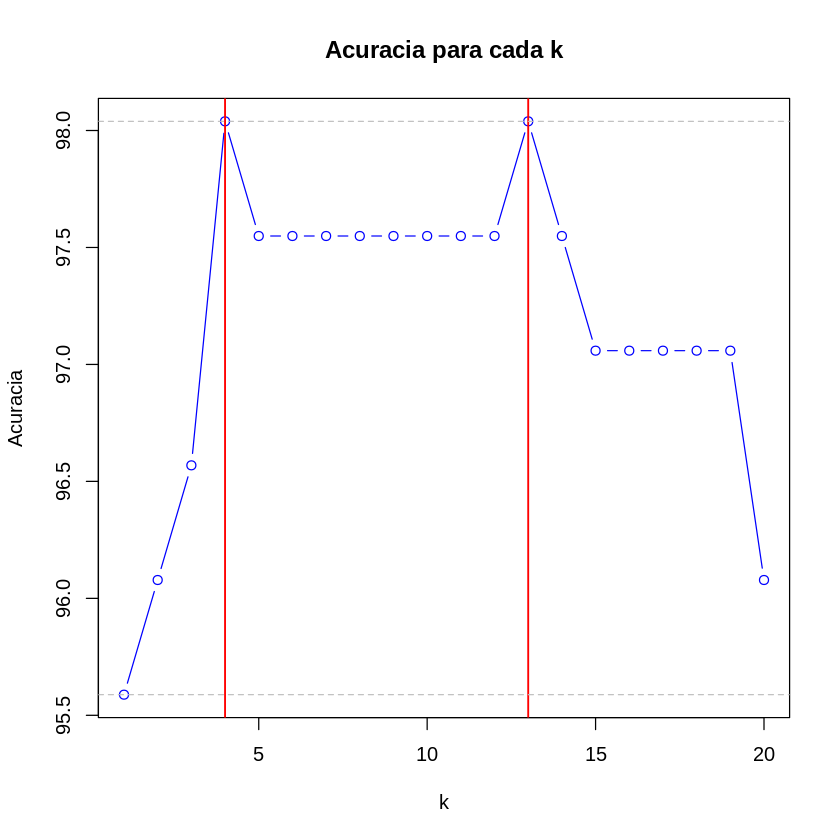

In [31]:
Knn_Testes = list()
acuracia = numeric()

for(k in 1:20){

  Knn_Testes[[k]] = knn(train_data[,1:9],test_data[,1:9],train_data$Class, k, prob=TRUE)
  acuracia[k] = sum(Knn_Testes[[k]]==test_data$Class)/length(test_data$Class)*100

}


plot(acuracia, type="b", col="blue", cex=1, pch=1,
     xlab="k", ylab="Acuracia",
     main="Acuracia para cada k")

abline(v=which(acuracia==max(acuracia)), col="red", lwd=1.5)
abline(h=max(acuracia), col="grey", lty=2)
abline(h=min(acuracia), col="grey", lty=2)

Acurácia para os 20 casos dos possíveis valores definidos para K. Como pudemos verificar, para k=4 e k=13 há uma acurácia ótima.